### Sammenlikning av GNSS data fra ulike mottakere

Laster inn data fra de ulike mottakerene (har et script som lager array fra kml filer). Data fra arduino-enheten filtreres til å kun inneholde koordinater fra når den faktisk lå på referansepunktet.

In [37]:
%run kml_to_arr.py

rtk_arr = extract_coordinates_kml_RTK(
    'dataset/sammenlikning_gnss/RTK_gnss_mottaker.kml'
    )
mobil_arr = extract_coordinates_kml_mobil(
    'dataset/sammenlikning_gnss/mobiltelefon_gnss_motaker.kml'
    )
arduino_arr = extract_coordinates_kml_arduino(
    'dataset/sammenlikning_gnss/arduino_gnss_mottaker.kml'
    )


Lager en funksjon som konverterer lengde- og breddegrad til UTM32 formatet. Slik at vi får standardavvik i meter.

In [38]:
import pyproj

def convert_to_utm32(coord_pairs):
    # Define the UTM32 (Zone 32N) projection 
    utm_proj = pyproj.Proj(proj='utm', zone=32, ellps='WGS84', south=False)

    # Convert the coordinates and return the combined UTM coordinates
    return list(zip(*utm_proj(*zip(*coord_pairs))))

Ønsker så å plotte data for oversikt. Har laget eget script for dette.

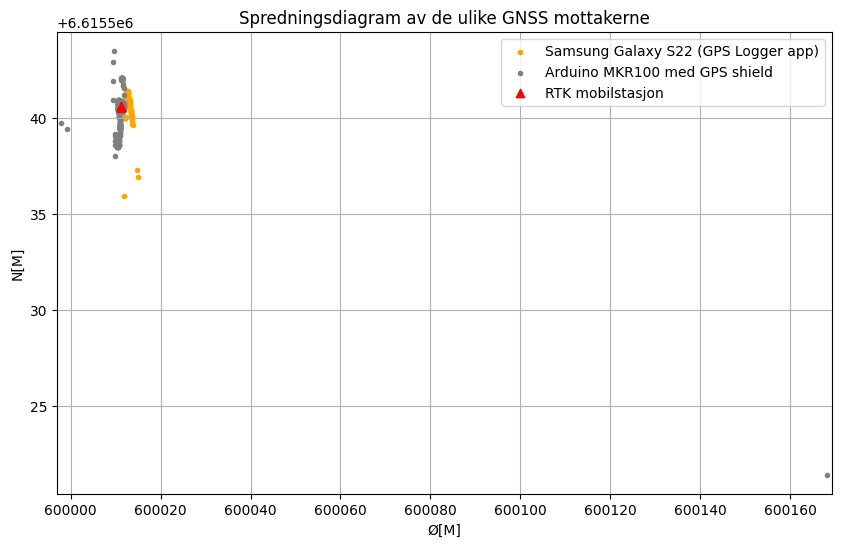

In [39]:
%run coordinates_scatterplot.py

plot_multiple_coordinates(
    convert_to_utm32(mobil_arr), 
    convert_to_utm32(arduino_arr),
    convert_to_utm32(rtk_arr),  
    labels=[
        'Samsung Galaxy S22 (GPS Logger app)', 
        'Arduino MKR100 med GPS shield',
        'RTK mobilstasjon'
    ], 
    colors=[
        'orange', 
        'grey', 
        'red'
    ]
)


Teit punkt langt øst. Hva faen?

In [40]:
def find_furthest_east(coordinates):
    # Ensure there are coordinates in the array
    if not coordinates:
        return None

    # Initialize variables to store the maximum longitude and the corresponding coordinate
    max_longitude = float('-inf')
    furthest_east_coordinate = None

    for coord in coordinates:
        longitude = coord[0]
        # Check if the current longitude is greater than the max found so far
        if longitude > max_longitude:
            max_longitude = longitude
            furthest_east_coordinate = coord

    return furthest_east_coordinate

find_furthest_east(arduino_arr)

[10.77808, 59.665681]